In [1]:
import os
import json
import numpy as np
import helper
import correlation_functions as cf
import preprocessing as pp

TRAINING_DATA_FOLDER_NAME = 'arcdata/easyTraining'
fileNames = os.listdir(TRAINING_DATA_FOLDER_NAME)
fileNames = list(filter(lambda x: 'label' not in x, fileNames))
jsonList = []
for j in fileNames:
    with open(TRAINING_DATA_FOLDER_NAME +"/" + j,"r") as file:
        jsonList.append(json.load(file))

check correlation of specific json

[[[[0 0 0 0 0 0 0]
   [0 2 2 2 2 0 0]
   [0 2 0 0 2 0 0]
   [0 2 2 2 2 0 0]
   [0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]]

  [[0 0 0 0 0 0 0]
   [0 2 2 2 2 0 0]
   [0 2 9 9 2 0 0]
   [0 2 2 2 2 0 0]
   [0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]]]


 [[[0 0 0 0 0 0 0]
   [4 4 4 4 4 4 0]
   [4 0 0 0 0 4 0]
   [4 0 0 0 0 4 0]
   [4 4 4 4 4 4 0]
   [0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]]

  [[0 0 0 0 0 0 0]
   [4 4 4 4 4 4 0]
   [4 9 9 9 9 4 0]
   [4 9 9 9 9 4 0]
   [4 4 4 4 4 4 0]
   [0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]]]


 [[[0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]
   [0 5 5 5 0 0 0]
   [0 5 0 5 0 0 0]
   [0 5 5 5 0 0 0]
   [0 0 0 0 0 0 0]]

  [[0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]
   [0 5 5 5 0 0 0]
   [0 5 9 5 0 0 0]
   [0 5 5 5 0 0 0]
   [0 0 0 0 0 0 0]]]]


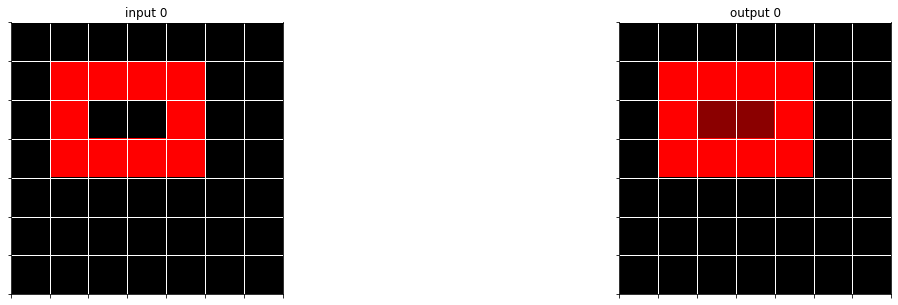

same shape:  True
(7, 7)
(7, 7)
same colors:  False
same size:  False
10
12
same color count:  False
Counter({'0': 39, '2': 10})
Counter({'0': 37, '2': 10, '9': 2})
color diff:  Counter({'0': 2, '2': 0, '9': -2})


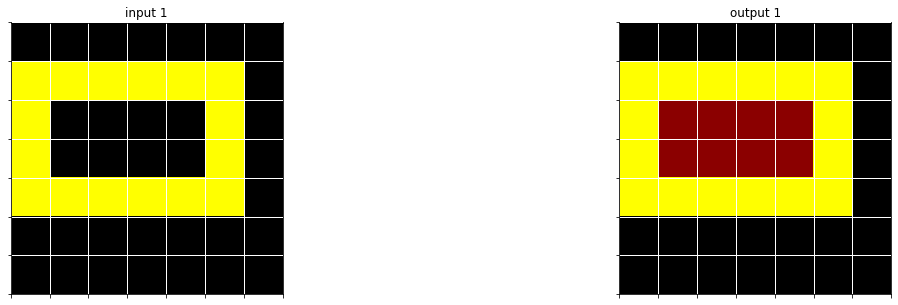

same shape:  True
(7, 7)
(7, 7)
same colors:  False
same size:  False
16
24
same color count:  False
Counter({'0': 33, '4': 16})
Counter({'0': 25, '4': 16, '9': 8})
color diff:  Counter({'0': 8, '4': 0, '9': -8})


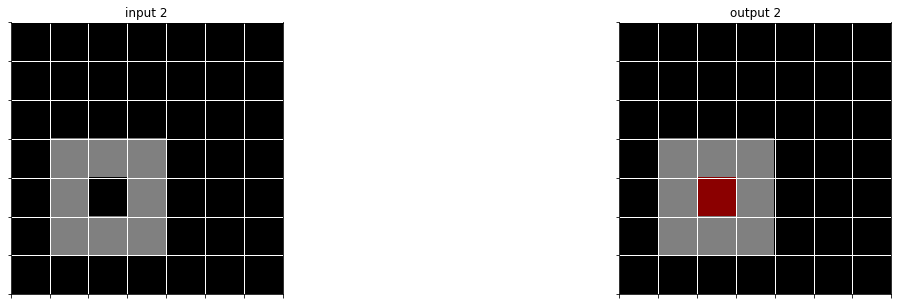

same shape:  True
(7, 7)
(7, 7)
same colors:  False
same size:  False
8
9
same color count:  False
Counter({'0': 41, '5': 8})
Counter({'0': 40, '5': 8, '9': 1})
color diff:  Counter({'0': 1, '5': 0, '9': -1})


In [2]:
from preprocessing import Grid

trainDatas = jsonList[11]['train']

to_preprocess = np.array([[np.array(trainData['input']),np.array(trainData['output'])] for i, trainData in enumerate(trainDatas)])
print(to_preprocess)
preprocessed = pp.preprocess(to_preprocess)
correlations = cf.correlate(preprocessed)


for i, trainData in enumerate(trainDatas):
    helper.displayIO([[np.array(trainData['input']),f'input {i}'],[np.array(trainData['output']),f'output {i}']])
    inputGrid = Grid(np.array(trainDatas[i]['input']))
    outputGrid = Grid(np.array(trainDatas[i]['output']))
    print("same shape: ", correlations[i].sameShape)
    print(inputGrid.shape)
    print(outputGrid.shape)
    print("same colors: ", correlations[i].sameColors)
    print("same size: ", correlations[i].sameSize)
    print(inputGrid.size)
    print(outputGrid.size)
    print("same color count: ", correlations[i].sameColorCount)
    print(correlations[i].colorCount( inputGrid ))
    print(correlations[i].colorCount( outputGrid))
    print("color diff: ", correlations[i].colorDiff)
    